## First steps with Python

In this example, we showcase iPython Notebook as a suitable solution for modeling and statical analysis in Synthetic Biology.

# Hello world

In [2]:
print 'Hello world'

Hello world


# Importing libraries

Plotting:

In [3]:
%matplotlib inline
import pylab as pl

Fast numerical calculations:

In [137]:
from math import *
import numpy as np

Pretty data sheets:

In [97]:
import pandas as pd

# Playing...

In [171]:
range(5)

[0, 1, 2, 3, 4]

In [185]:
X = np.arange(0.,50.,1.0)

In [186]:
print X

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.]


In [187]:
Y = np.random.standard_normal(50)
print Y

[ 0.10104462  0.87785135  1.25416277 -1.80586238  1.57417727  0.17782185
  1.61075397  0.5793364  -0.2645429  -2.37488708 -0.81166024 -0.67589144
 -0.21292511  2.16267962 -0.63285788 -2.53557841  2.03904118 -0.5266592
  2.32924182  0.77619663  0.37557364 -1.46736163  0.16841776 -1.73960378
 -0.85063884 -1.1439298   0.7962734   0.21123938 -0.17886113  1.36375844
  0.97191811  0.79574675  0.63466034  1.31903441  0.0438713   0.97195209
 -0.22004354  1.49397072  1.28874688  0.81642501  0.31564766 -0.312945
 -0.39498404 -0.99130446  1.32204434 -0.4732651   1.52235852 -0.66497908
 -0.90279505 -0.63420342]


In [188]:
print X.shape, Y.shape

(50,) (50,)


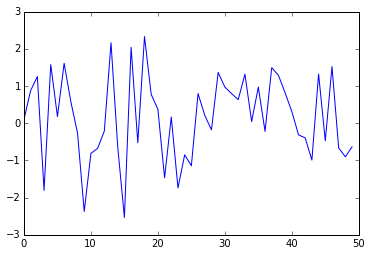

In [189]:
pl.plot(X,Y)

Let's calculate some propertis of X and Y

Average value:  0.161563334603
Variance:  1.30203547644
Stand. deviation:  1.14106769144
Histogram:


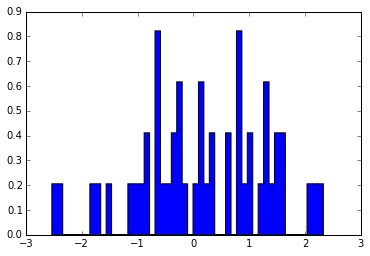

In [192]:
print 'Average value: ', Y.mean()
print 'Variance: ', Y.var()
print 'Stand. deviation: ', sqrt(Y.var())
print 'Histogram:'
pl.hist(Y, 50, normed=1, histtype='stepfilled');
pl.show()

Of course, the above histogram doesn't look good. This is simply due the poor sampling, however the method to construct histograms is that simple: a function from <i>pylab</i> library. In the next sections, we will use a known dataset and properly illustrate it again.

You can use \t to add tabs and line everything up. You can also use \n as linebreak.

In [193]:
print 'Average value: \t\t', Y.mean()
print 'Variance: \t\t', Y.var()
print 'Stand. deviation: \t', sqrt(Y.var())

Average value: 		0.161563334603
Variance: 		1.30203547644
Stand. deviation: 	1.14106769144


In [198]:
print Y[:2]
print Y[:5]
print Y[:8]

[ 0.10104462  0.87785135]
[ 0.10104462  0.87785135  1.25416277 -1.80586238  1.57417727]
[ 0.10104462  0.87785135  1.25416277 -1.80586238  1.57417727  0.17782185
  1.61075397  0.5793364 ]


In [195]:
for y in Y[:5]:
    print 'Squared: ', y**2

Squared:  0.010210014461
Squared:  0.770623000707
Squared:  1.57292425217
Squared:  3.26113894904
Squared:  2.47803407407


# Functions

We next introduce how you define a function. Suppose you want to define a Hill Function, which is readily
$$F_{k,n}(x) = \frac{1}{1+\dfrac{k}{x^n}},$$
where $k$ and $n$ are constants you can adjust to fit your data.

In [58]:
def Hill(X, K = 1.0, n = 2.0):
    return 1./(1. + (K/X)**(n))

As you can see, we have three arguments:
* X - a number of an array with values where we want to evalute the Hill function
* K, n - is the k in our above definition

Notice that K and n are defined differently. 

We can then calculate it on some values...

In [169]:
X = np.arange(0.,10.,1.0)
HX = Hill(X)
print HX

[ 0.          0.5         0.8         0.9         0.94117647  0.96153846
  0.97297297  0.98        0.98461538  0.98780488]


And plot it...

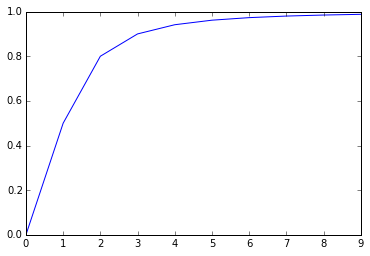

In [170]:
pl.plot(X, HX)

To improve the quality of the curve (make it more smooth), we can increase the number of points in X. Nevertheless, we don't want to change the interval. Therefore, we will only change the step from 1.0 to 0.1, ending up with ten times more points.

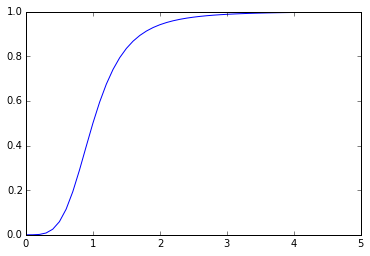

In [241]:
X = np.arange(0.,5.,0.1)
pl.plot(X, Hill(X, n=4.))

You may experience an error: division by zero (0). That happens because in X we have a zero element, and it will try to evaluate the Hill function in zero. To avoid this, we will slightly change our function:

In [74]:
def Hill_complete(X, K = 1.0, n = 2.0):
    XX = X
    XX[ X == 0 ] = 1e-20
    return 1./(1. + (K/XX)**(n))

As you can see, whenever the argument is zero, we switched it by a very small real number. Since the function is continuous, it will "look nice" near zero.

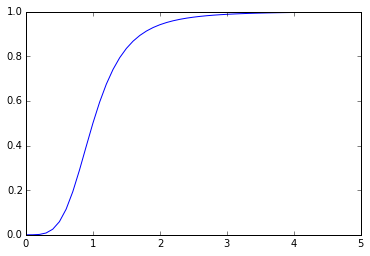

In [242]:
X = np.arange(0.,5.,0.1)
pl.plot(X, Hill_complete(X, n=4.))

Finally, let's try changing K.

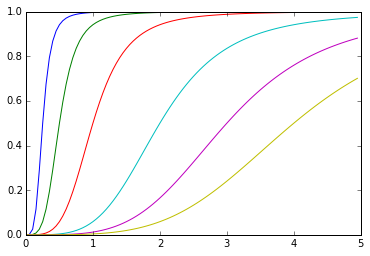

In [235]:
X = np.arange(0.,5.,0.05)

for k in [0.25, 0.5, 1.0, 2.0, 3.0, 4.0]:
    pl.plot(X, Hill_complete(X, n=4., K=k))

# Manipulating data sheets

Next, we will create a DataFrame, which will store all data we want to work on for us. Since we often have large datasets, we don't want to print all dataset in the screen, but have a feeling of what's in a particular DataFrame. For this purpose, you can use the <i>head()</i> method as below. Then, python will only print the first 5 rows of your DataFrame.

In [236]:
df = pd.DataFrame({
        'K = 0.5' : Hill_complete(X, n=4., K=0.5), 
        'K = 1.0' : Hill_complete(X, n=4., K=1.0), 
        'K = 1.5' : Hill_complete(X, n=4., K=1.5),
        'K = 2.0' : Hill_complete(X, n=4., K=2.5)
    })

df.head()

,K = 0.5,K = 1.0,K = 1.5,K = 2.0
0,1.600000e-79,1.000000e-80,1.975309e-81,2.560000e-82
1,9.999000e-05,6.249961e-06,1.234566e-06,1.600000e-07
2,1.597444e-03,9.999000e-05,1.975270e-05,2.559993e-06
3,8.034917e-03,5.059938e-04,9.999000e-05,1.295983e-05
4,2.496100e-02,1.597444e-03,3.159495e-04,4.095832e-05


We can easily plot 

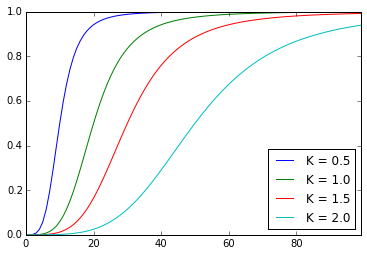

In [237]:
df.plot()

We see here the average value of each curve:

In [238]:
df.mean()

K = 0.5    0.883962
K = 1.0    0.773397
K = 1.5    0.664515
K = 2.0    0.460232
dtype: float64

We now evaluate the variance of each curve.

In [239]:
df.var()

K = 0.5    0.075595
K = 1.0    0.121473
K = 1.5    0.143790
K = 2.0    0.130946
dtype: float64

Exporting to CSV (excell compatiable).

In [222]:
df.to_csv('Test.csv')

In [223]:
more Test.csv

# Data analysis